In [17]:
import pandas as pd

# 파일 경로
rental_file = "./광진구_2026.csv"
apartment_file = "./아파트_utf8.csv"
subway_file = "./지하철_utf8.csv"

# 데이터 불러오기
rental_data = pd.read_csv(rental_file)
apartment_data = pd.read_csv(apartment_file)
subway_data = pd.read_csv(subway_file)

# 데이터 미리보기
rental_data.head(), apartment_data.head(), subway_data.head()


(   대여소번호      대여소명  자치구     동                          상세주소         위도  \
 0    584  광진광장 교통섬  광진구   군자동  서울특별시 광진구 군자동 374-8 광진광장 교통섬  37.547829   
 1    501   광진구의회 앞  광진구  자양3동      서울특별시 광진구 능동로 76 광진구의회 앞  37.537308   
 2   3501    광진구청 앞  광진구  자양1동      서울특별시 광진구 자양로 131 광진구청 앞  37.539501   
 3    516   광진메디칼 앞  광진구   군자동     서울특별시 광진구 광나루로 355 광진메디컬앞  37.548405   
 4   3503    광진유진스웰  광진구   광장동    서울특별시 광진구 아차산로78길 7 광진유진스웰  37.550488   
 
            경도              설치시기  2025_대여량  
 0  127.072632  2016/09/02 11:00       1.0  
 1  127.070351  2015/10/07 11:46       1.0  
 2  127.083000  2017/11/01 12:11       1.0  
 3  127.069367  2015/10/07 11:59       1.0  
 4  127.108955  2017/11/01 12:14       1.0  ,
              주거지         위도          경도
 0  송정동서울숲아이파크아파트  37.553029  127.069772
 1   롯데캐슬리버파크시그니처  37.537828  127.063145
 2           한림타워  37.540868  127.069062
 3        한강우성아파트  37.532794  127.065776
 4       자양동삼성아파트  37.532360  127.071525,
         역명         위도        

In [18]:
import folium
from folium import Map, Marker
from folium.plugins import BeautifyIcon

# 지도 초기화 (광진구 중심 좌표 사용)
center_lat, center_lon = 37.540394, 127.069292  # 건대입구역 기준
m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

# 대여소 데이터: 원(circle)으로 표시
color_map = {3: "green", 1: "red", 0: "black", 2: "orange", 4: "blue"}  # 더 진한 색상으로 변경
for _, row in rental_data.iterrows():
    folium.Marker(
        location=[row["위도"], row["경도"]],
        icon=BeautifyIcon(
            icon="bicycle",                # 자전거 아이콘
            icon_shape="circle",            # 원형 아이콘
            border_color=color_map.get(row["2025_대여량"], "#404040"),
            background_color=color_map.get(row["2025_대여량"], "#404040"),
            text_color="white",             # 아이콘 내부 텍스트 색상                  # 자전거 아이콘 회전 애니메이션
        ),
        tooltip=f"대여량: {row['2025_대여량']}"
    ).add_to(m)

# 아파트 데이터: 네모(square)로 표시
for _, row in apartment_data.iterrows():
    folium.Marker(
        location=[row["위도"], row["경도"]],
        icon=BeautifyIcon(
            icon="home",               # 집 아이콘
            icon_shape="marker",        # 기본 마커 모양
            border_color="#404040",     # 진한 회색 테두리
            background_color="#404040", # 진한 회색 배경
            text_color="white",         # 아이콘 내부 색상
            spin=False                  # 고정 아이콘 (회전 X)
        ),
        tooltip="아파트"
    ).add_to(m)

# 지하철 데이터
for _, row in subway_data.iterrows():
    folium.Marker(
        location=[row["위도"], row["경도"]],
        icon=BeautifyIcon(
            icon="subway",             # 지하철 아이콘
            icon_shape="marker",        # 기본 마커 모양
            border_color="#800080",     # 진한 보라색 테두리
            background_color="#800080", # 진한 보라색 배경
            text_color="white",         # 아이콘 내부 색상
        ),
        tooltip="지하철역"
    ).add_to(m)

# 건대 영역
konkuk_coords = [
    (37.544390, 127.072915),
    (37.540069, 127.070893),
    (37.538716, 127.075005),
    (37.540182, 127.081182),
    (37.540194, 127.081636),
    (37.541465, 127.082197),
    (37.542672, 127.078695),
    (37.543863, 127.078936),
    (37.544271, 127.080068),
    (37.544939, 127.079929),
    (37.544880, 127.076732),
    (37.544604, 127.073054)
]

# 초록색 영역 추가
folium.Polygon(
    locations=konkuk_coords,
    color="blue",
    fill=True,
    fill_color="blue",
    fill_opacity=0.2
).add_to(m)

# 세종대 영역
sejong_coords = [
    (37.549088, 127.075207),
    (37.551057, 127.076222),
    (37.552030, 127.074789),
    (37.552541, 127.074814),
    (37.553462, 127.073589),
    (37.552947, 127.072452),
    (37.552218, 127.072693),
    (37.551790, 127.073099),
    (37.550265, 127.072828),
    (37.549357, 127.073453),
    (37.548422, 127.073303),
    (37.548307, 127.074726)
]

folium.Polygon(
    locations=sejong_coords,
    color="blue",
    fill=True,
    fill_color="blue",
    fill_opacity=0.2
).add_to(m)

# 어대 영역
child_coords = [
    (37.547469, 127.074616),
    (37.551722, 127.076847),
    (37.552586, 127.083621),
    (37.551892, 127.083993),
    (37.551297, 127.085666),
    (37.552062, 127.089014),
    (37.551348, 127.089529),
    (37.549017, 127.085773),
    (37.546142, 127.085709),
    (37.545427, 127.083993),
    (37.545802, 127.078650)
]

folium.Polygon(
    locations=child_coords,
    color="green",
    fill=True,
    fill_color="green",
    fill_opacity=0.2
).add_to(m)


# 자전거 도로 1 (굵은 선, 빨강색)
bike_path_1 = [
    (37.532561, 127.058729),
    (37.528605, 127.070150),
    (37.526816, 127.080112),
    (37.526810, 127.084101),
    (37.528277, 127.089473),
    (37.544157, 127.108020),
    (37.550349, 127.110981)
]

folium.PolyLine(
    locations=bike_path_1,
    color="red",
    weight=6,  # 선 두께
    opacity=0.8
).add_to(m)

# 자전거 도로 2 (굵은 선, 빨간색)
bike_path_2 = [
    (37.548916, 127.063057),
    (37.550413, 127.065332),
    (37.556708, 127.070138),
    (37.562763, 127.075116),
    (37.571641, 127.079279)
]

folium.PolyLine(
    locations=bike_path_2,
    color="red",
    weight=6,  # 선 두께
    opacity=0.8
).add_to(m)


# 군자동 + 화양동 + 자양1동 -> 20-30대 많은 행정동 
gunja_hwayang_jayang1_coords = [
    (37.559410, 127.073359),
    (37.542044, 127.064012),
    (37.537895, 127.077076),
    (37.533205, 127.075773),
    (37.531400, 127.082146),
    (37.532411, 127.085271),
    (37.536670, 127.083390),
    (37.540034, 127.083120),
    (37.541940, 127.081704),
    (37.543488, 127.081682),
    (37.545184, 127.082470),
    (37.545841, 127.077175),
    (37.547237, 127.074202),
    (37.557195, 127.079237)
]

folium.Polygon(
    locations=gunja_hwayang_jayang1_coords,
    color="yellow",
    fill=True,
    fill_color="yellow",
    fill_opacity=0.2
).add_to(m)

# 구의3동 -> 20-30대 많은 행정동 
gui3_coords = [
    (37.544601, 127.090642),
    (37.537924, 127.089059),
    (37.537843, 127.089493),
    (37.533330, 127.090106),
    (37.533679, 127.091082),
    (37.533007, 127.091104),
    (37.532641, 127.091651),
    (37.530488, 127.091951),
    (37.529782, 127.091587),
    (37.536767, 127.100985),
    (37.543917, 127.092840)
]

folium.Polygon(
    locations=gui3_coords,
    color="yellow",
    fill=True,
    fill_color="yellow",
    fill_opacity=0.2
).add_to(m)


# 광진구 경계선 좌표
gwangjin_boundary = [
    (37.529760, 127.056950),
    (37.523293, 127.081498),
    (37.530943, 127.097380),
    (37.543372, 127.111539),
    (37.558002, 127.115744),
    (37.557594, 127.105788),
    (37.571745, 127.104329),
    (37.573253, 127.100710),
    (37.569227, 127.089379),
    (37.571852, 127.078433),
    (37.560326, 127.071773),
    (37.559639, 127.073025),
    (37.529760, 127.056950)  # 시작점과 끝점을 연결하여 닫힌 경계선 생성
]

# 광진구 경계선 추가 (검정색)
folium.PolyLine(
    locations=gwangjin_boundary,
    color="black",
    weight=2,  # 선 두께
    opacity=0.5
).add_to(m)

legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 200px; height: 300px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            padding: 10px;
            opacity: 0.8;">
            <b>범례:</b><br>
            <span style="color:red;">●</span> 최고수요 대여소<br>
            <span style="color:orange;">●</span> 고수요 대여소<br>
            <span style="color:green;">●</span> 중수요 대여소<br>
            <span style="color:blue;">●</span> 저수요 대여소<br>
            <span style="color:black;">●</span> 신규 대여소<br>
            <span style="color:#404040;"><i class="fa fa-home"></i></span> 아파트<br>
            <span style="color:#800080;"><i class="fa fa-subway"></i></span> 지하철역<br>
            <b>구역역:</b><br>
            <span style="color:red;">━</span> 자전거 도로<br>
            <span style="color:yellow;">■</span> 20-30대 유동인구 많은 동<br>
            <span style="color:blue;">■</span> 대학교<br>
            <span style="color:green;">■</span> 공원
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

m



In [20]:
# 기본 지도는 유지하고, 검정점의 반경을 추가
for _, row in rental_data.iterrows():
    if row['2025_대여량'] == 0:  # 검정점인 경우
        # 50m 반경 (빨강)
        folium.Circle(
            location=[row['위도'], row['경도']],
            radius=50,
            color='red',
            fill=True,
            fill_opacity=0.1
        ).add_to(m)
        
        # 100m 반경 (파랑)
        folium.Circle(
            location=[row['위도'], row['경도']],
            radius=100,
            color='blue',
            fill=True,
            fill_opacity=0.1
        ).add_to(m)
        
        # 200m 반경 (초록)
        folium.Circle(
            location=[row['위도'], row['경도']],
            radius=200,
            color='green',
            fill=True,
            fill_opacity=0.1
        ).add_to(m)
        
        # 400m 반경 (보라)
        folium.Circle(
            location=[row['위도'], row['경도']],
            radius=400,
            color='purple',
            fill=True,
            fill_opacity=0.1
        ).add_to(m)

# 범례 추가
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; right: 50px; width: 150px; height: 130px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            padding: 10px;
            opacity: 0.8;">
            반경 범례:<br>
            <span style="color:red;">━━</span> 50m<br>
            <span style="color:blue;">━━</span> 100m<br>
            <span style="color:green;">━━</span> 200m<br>
            <span style="color:purple;">━━</span> 400m
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

m

In [4]:
from geopy.distance import geodesic
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import numpy as np

# 신규 대여소(검정점) 추출
new_stations = rental_data[rental_data['2025_대여량'] == 0]

# 각 신규 대여소별 분석
for _, station in new_stations.iterrows():
    print(f"\n=== {station['대여소명']} ({station['대여소번호']}) ===")
    station_point = (station['위도'], station['경도'])
    
    # 각 반경별 분석
    for radius in [50, 100, 200, 400]:
        print(f"\n{radius}m 반경 내 시설:")
        found_items = []
        
        # 1. 기존 대여소 확인
        for _, other in rental_data[rental_data['2025_대여량'] > 0].iterrows():
            dist = geodesic(station_point, (other['위도'], other['경도'])).meters
            if dist <= radius:
                demand_level = {1:'최고수요', 2:'고수요', 3:'중수요', 4:'저수요'}[other['2025_대여량']]
                found_items.append(f"- {demand_level} 대여소 ({other['대여소명']})")
        
        # 2. 지하철역 확인
        for _, subway in subway_data.iterrows():
            dist = geodesic(station_point, (subway['위도'], subway['경도'])).meters
            if dist <= radius:
                found_items.append(f"- 지하철역 ({subway['역명']})")
        
        # 3. 아파트 확인
        apt_count = 0
        for _, apt in apartment_data.iterrows():
            dist = geodesic(station_point, (apt['위도'], apt['경도'])).meters
            if dist <= radius:
                apt_count += 1
        if apt_count > 0:
            found_items.append(f"- 아파트 {apt_count}개")
        
        # 4. 특수구역 확인
        point = Point(station_point[1], station_point[0])
        buffer = point.buffer(radius/111000)
        
        # 건국대
        if buffer.intersects(Polygon([(x[1], x[0]) for x in konkuk_coords])):
            found_items.append("- 건국대 영역")
        
        # 세종대
        if buffer.intersects(Polygon([(x[1], x[0]) for x in sejong_coords])):
            found_items.append("- 세종대 영역")
        
        # 어린이대공원
        if buffer.intersects(Polygon([(x[1], x[0]) for x in child_coords])):
            found_items.append("- 어린이대공원")
        
        # 20-30대 많은 행정동
        if (buffer.intersects(Polygon([(x[1], x[0]) for x in gunja_hwayang_jayang1_coords])) or 
            buffer.intersects(Polygon([(x[1], x[0]) for x in gui3_coords]))):
            found_items.append("- 20-30대 많은 행정동")
        
        # 5. 자전거도로 확인
        bike_line1 = LineString([(x[1], x[0]) for x in bike_path_1])
        bike_line2 = LineString([(x[1], x[0]) for x in bike_path_2])
        if buffer.intersects(bike_line1) or buffer.intersects(bike_line2):
            found_items.append("- 자전거도로")
        
        # 결과 출력
        if found_items:
            print('\n'.join(found_items))
        else:
            print("- 없음")


=== 건국대학교 신공학관 (3900) ===

50m 반경 내 시설:
- 건국대 영역
- 20-30대 많은 행정동

100m 반경 내 시설:
- 건국대 영역
- 20-30대 많은 행정동

200m 반경 내 시설:
- 최고수요 대여소 (건국대학교 과학관(이과대) 앞)
- 최고수요 대여소 (건국대학교 학생회관)
- 건국대 영역
- 20-30대 많은 행정동

400m 반경 내 시설:
- 최고수요 대여소 (광진구청 앞)
- 최고수요 대여소 (건국대학교 과학관(이과대) 앞)
- 최고수요 대여소 (건국대학교 학생회관)
- 중수요 대여소 (원일교회)
- 건국대 영역
- 20-30대 많은 행정동

=== 노룬산시장앞 (3894) ===

50m 반경 내 시설:
- 없음

100m 반경 내 시설:
- 없음

200m 반경 내 시설:
- 중수요 대여소 (영동대교 북단)
- 아파트 1개

400m 반경 내 시설:
- 중수요 대여소 (영동대교 북단)
- 아파트 1개

=== 아차산역 2번출구 (3899) ===

50m 반경 내 시설:
- 없음

100m 반경 내 시설:
- 중수요 대여소 (아차산역 3번출구)

200m 반경 내 시설:
- 중수요 대여소 (아차산역 3번출구)
- 중수요 대여소 (아차산역4번출구)
- 지하철역 (아차산역)
- 어린이대공원

400m 반경 내 시설:
- 저수요 대여소 (홍련봉 공원)
- 중수요 대여소 (아차산역 3번출구)
- 중수요 대여소 (아차산역4번출구)
- 지하철역 (아차산역)
- 어린이대공원

=== 올림픽대교 북단 (3898) ===

50m 반경 내 시설:
- 없음

100m 반경 내 시설:
- 없음

200m 반경 내 시설:
- 저수요 대여소 (현대홈타운 뒷길)
- 아파트 1개

400m 반경 내 시설:
- 고수요 대여소 (구의삼성쉐르빌 앞)
- 저수요 대여소 (현대홈타운 뒷길)
- 중수요 대여소 (우성식품 앞)
- 아파트 1개
- 20-30대 많은 행정동

=== 자양2동 주민센터 (3882) ===

50m 반경 내 시설:
- 없음


In [6]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

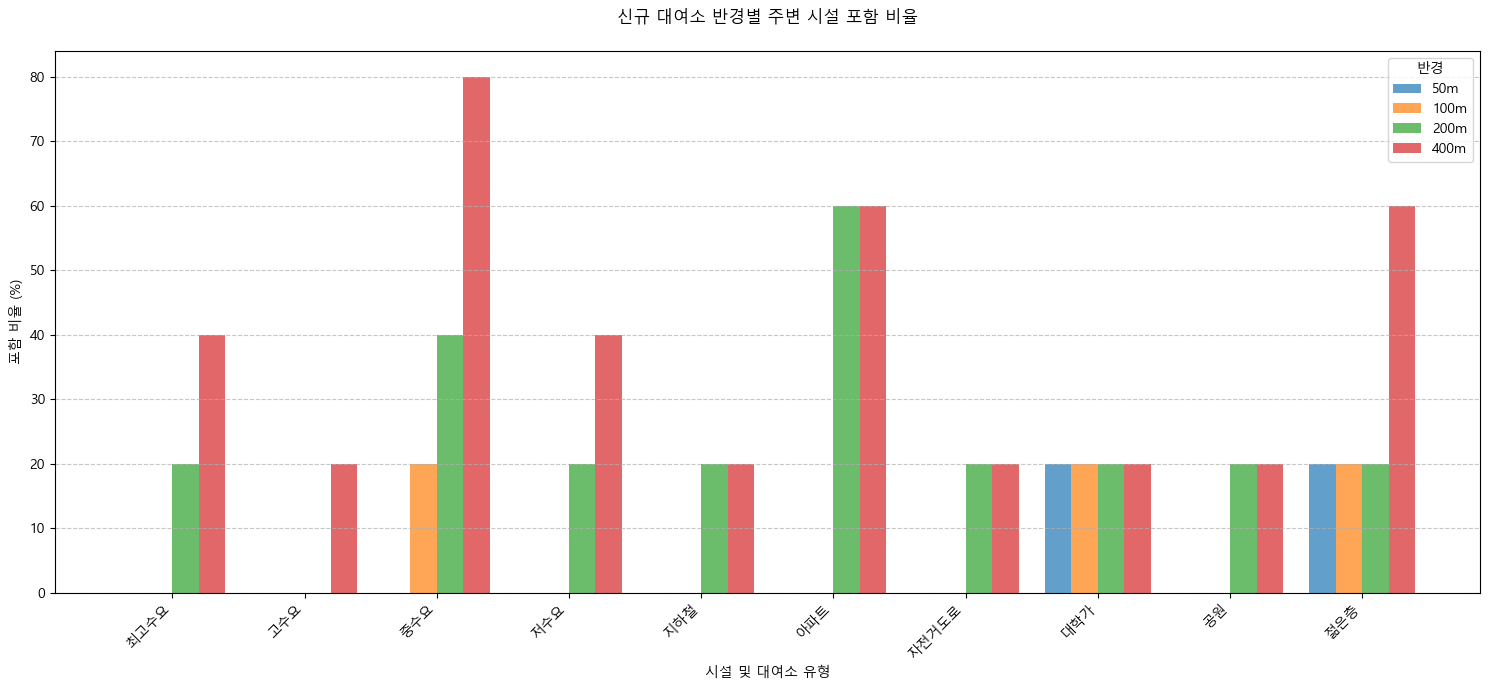

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic
from shapely.geometry import Point, LineString, Polygon

# ... (이전 import문들)

# 전체 신규 대여소 수
total_stations = len(new_stations)

# 각 반경별 특징 비율 계산
radius_stats = {50: {}, 100: {}, 200: {}, 400: {}}

# 모든 반경에 대해 딕셔너리 초기화
for radius in [50, 100, 200, 400]:
    radius_stats[radius] = {
        '최고수요': 0, 
        '고수요': 0, 
        '중수요': 0, 
        '저수요': 0,
        '지하철': 0, 
        '아파트': 0, 
        '자전거도로': 0, 
        '대학가': 0,
        '공원': 0,
        '젊은층': 0
    }

for _, station in new_stations.iterrows():
    station_point = (station['위도'], station['경도'])
    
    for radius in [50, 100, 200, 400]:
        # 1. 기존 대여소 확인 (수정된 부분)
        demand_types_found = {'최고수요': False, '고수요': False, '중수요': False, '저수요': False}
        
        for _, other in rental_data[rental_data['2025_대여량'] > 0].iterrows():
            dist = geodesic(station_point, (other['위도'], other['경도'])).meters
            if dist <= radius:
                demand_type = {1:'최고수요', 2:'고수요', 3:'중수요', 4:'저수요'}[other['2025_대여량']]
                demand_types_found[demand_type] = True
        
        # 발견된 수요 유형 카운트
        for demand_type, found in demand_types_found.items():
            if found:
                radius_stats[radius][demand_type] += 1
        
        # 2. 지하철 확인
        has_subway = False
        for _, subway in subway_data.iterrows():
            if geodesic(station_point, (subway['위도'], subway['경도'])).meters <= radius:
                has_subway = True
                break
        if has_subway:
            radius_stats[radius]['지하철'] += 1
        
        # 3. 아파트 확인
        has_apt = False
        for _, apt in apartment_data.iterrows():
            if geodesic(station_point, (apt['위도'], apt['경도'])).meters <= radius:
                has_apt = True
                break
        if has_apt:
            radius_stats[radius]['아파트'] += 1
        
        # 4. 자전거도로 & 특수구역
        point = Point(station_point[1], station_point[0])
        buffer = point.buffer(radius/111000)
        
        # 자전거도로
        bike_line1 = LineString([(coord[1], coord[0]) for coord in bike_path_1])
        bike_line2 = LineString([(coord[1], coord[0]) for coord in bike_path_2])
        if buffer.intersects(bike_line1) or buffer.intersects(bike_line2):
            radius_stats[radius]['자전거도로'] += 1
        
        # 대학가 (건국대, 세종대)
        konkuk = Polygon([(coord[1], coord[0]) for coord in konkuk_coords])
        sejong = Polygon([(coord[1], coord[0]) for coord in sejong_coords])
        if buffer.intersects(konkuk) or buffer.intersects(sejong):
            radius_stats[radius]['대학가'] += 1
        
        # 공원 (어린이대공원)
        child = Polygon([(coord[1], coord[0]) for coord in child_coords])
        if buffer.intersects(child):
            radius_stats[radius]['공원'] += 1
        
        # 젊은층 많은 지역
        gunja = Polygon([(coord[1], coord[0]) for coord in gunja_hwayang_jayang1_coords])
        gui = Polygon([(coord[1], coord[0]) for coord in gui3_coords])
        if buffer.intersects(gunja) or buffer.intersects(gui):
            radius_stats[radius]['젊은층'] += 1

# 비율로 변환
for radius in radius_stats:
    for key in radius_stats[radius]:
        radius_stats[radius][key] = (radius_stats[radius][key] / total_stations) * 100

# 시각화
plt.figure(figsize=(15, 7))

categories = ['최고수요', '고수요', '중수요', '저수요', '지하철', '아파트', '자전거도로', 
              '대학가', '공원', '젊은층']
colors = ['#FF0000', '#FF6600', '#00FF00', '#0066FF', '#800080', '#404040', '#FF9999', 
          '#FFD700', '#98FB98', '#DDA0DD']
x = np.arange(len(categories))
width = 0.2

for i, radius in enumerate([50, 100, 200, 400]):
    values = [radius_stats[radius][cat] for cat in categories]
    plt.bar(x + i*width, values, width, label=f'{radius}m', alpha=0.7)
    


plt.xlabel('시설 및 대여소 유형')
plt.ylabel('포함 비율 (%)')
plt.title('신규 대여소 반경별 주변 시설 포함 비율', pad=20)
plt.xticks(x + width*1.5, categories, rotation=45, ha='right')
plt.legend(title='반경')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

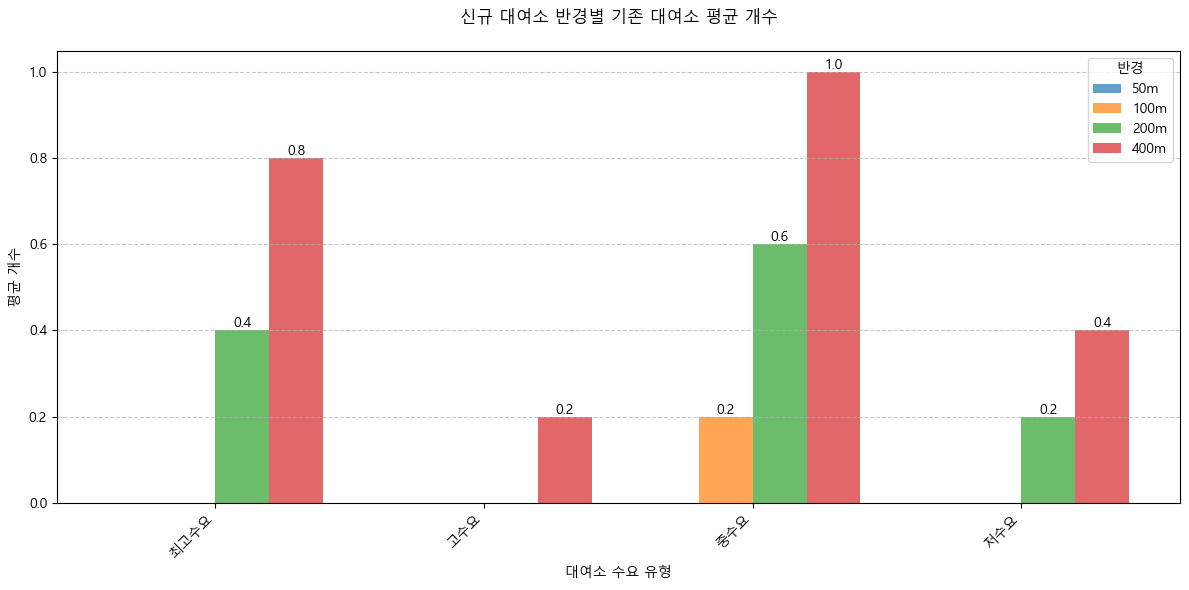

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic
from shapely.geometry import Point, LineString, Polygon

# 전체 신규 대여소 수
total_stations = len(new_stations)

# 각 반경별 대여소 개수 저장
radius_counts = {50: {}, 100: {}, 200: {}, 400: {}}

# 초기화
for radius in [50, 100, 200, 400]:
    radius_counts[radius] = {
        '최고수요': [],  # 각 신규 대여소별 개수를 리스트로 저장
        '고수요': [],
        '중수요': [],
        '저수요': []
    }

# 각 신규 대여소별로 반경 내 대여소 개수 계산
for _, station in new_stations.iterrows():
    station_point = (station['위도'], station['경도'])
    
    for radius in [50, 100, 200, 400]:
        counts = {'최고수요': 0, '고수요': 0, '중수요': 0, '저수요': 0}
        
        for _, other in rental_data[rental_data['2025_대여량'] > 0].iterrows():
            dist = geodesic(station_point, (other['위도'], other['경도'])).meters
            if dist <= radius:
                demand_type = {1:'최고수요', 2:'고수요', 3:'중수요', 4:'저수요'}[other['2025_대여량']]
                counts[demand_type] += 1
        
        # 각 수요별 개수 저장
        for demand_type in counts:
            radius_counts[radius][demand_type].append(counts[demand_type])

# 평균 및 통계 계산
stats = {radius: {} for radius in [50, 100, 200, 400]}

for radius in [50, 100, 200, 400]:
    for demand_type in ['최고수요', '고수요', '중수요', '저수요']:
        values = radius_counts[radius][demand_type]
        stats[radius][demand_type] = {
            '평균': np.mean(values),
            '최대': np.max(values),
            '최소': np.min(values)
        }

# 시각화
plt.figure(figsize=(12, 6))

categories = ['최고수요', '고수요', '중수요', '저수요']
colors = ['#FF0000', '#FF6600', '#00FF00', '#0066FF']
x = np.arange(len(categories))
width = 0.2

for i, radius in enumerate([50, 100, 200, 400]):
    values = [stats[radius][cat]['평균'] for cat in categories]
    plt.bar(x + i*width, values, width, label=f'{radius}m', alpha=0.7)
    
    # 값 표시 (평균값)
    for j, v in enumerate(values):
        if v > 0:
            plt.text(x[j] + i*width, v, f'{v:.1f}', ha='center', va='bottom')

plt.xlabel('대여소 수요 유형')
plt.ylabel('평균 개수')
plt.title('신규 대여소 반경별 기존 대여소 평균 개수', pad=20)
plt.xticks(x + width*1.5, categories, rotation=45, ha='right')
plt.legend(title='반경')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from shapely.geometry import Point, Polygon, LineString
import folium

# 광진구 전체 영역을 격자로 나누어 후보지 생성
def create_grid_points(boundary_coords, grid_size=0.0005):  # 약 50m 간격
    lats = [coord[0] for coord in boundary_coords]
    lons = [coord[1] for coord in boundary_coords]
    
    lat_grid = np.arange(min(lats), max(lats), grid_size)
    lon_grid = np.arange(min(lons), max(lons), grid_size)
    
    points = []
    boundary = Polygon([(coord[1], coord[0]) for coord in gwangjin_boundary])
    
    for lat in lat_grid:
        for lon in lon_grid:
            point = Point(lon, lat)
            if boundary.contains(point):
                points.append((lat, lon))
    
    return points

def evaluate_new_station(point, rental_data, subway_data, apartment_data, 
                        gui3_coords, gunja_hwayang_jayang1_coords, bike_path_1, bike_path_2,
                        konkuk_coords, sejong_coords, child_coords):
    score = 0
    point_coords = (point[0], point[1])
    point_geom = Point(point[1], point[0])

    # 0. 기존 대여소와 너무 가까운지 확인 (50m 이내면 설치 불가)
    close_stations = 0
    for _, station in rental_data.iterrows():
        dist = geodesic(point_coords, (station['위도'], station['경도'])).meters
        if dist < 50:
            return -1
        if dist < 300:
            close_stations += 1

    # 1. 기존 대여소 밀집도 고려
    if close_stations >= 5:
        return -1

    # 2. 대여소 수요 수준 고려 (20점)
    demand_score = 0
    for _, station in rental_data.iterrows():
        dist = geodesic(point_coords, (station['위도'], station['경도'])).meters
        
        # 최고수요 (1) - 가장 낮은 점수 (신규 설치 필요성 낮음)
        if station['2025_대여량'] == 1:
            if dist <= 200:
                demand_score += 3
            elif dist <= 400:
                demand_score += 6
        
        # 고수요 (2) - 가장 높은 점수 (수요 분산 필요)
        elif station['2025_대여량'] == 2:
            if dist <= 200:
                demand_score += 0
            elif dist <= 400:
                demand_score += 1
        
        # 중수요 (3) - 중간 점수
        elif station['2025_대여량'] == 3:
            if dist <= 200:
                demand_score += 4
            elif dist <= 400:
                demand_score += 8
        
        # 저수요 (4) - 낮은 점수
        elif station['2025_대여량'] == 4:
            if dist <= 200:
                demand_score += 2
            elif dist <= 400:
                demand_score += 4

    score += min(demand_score, 20)

    # 3-1. 지하철역 접근성 (25점)
    subway_score = 0
    near_subway = False  # 지하철 근처 여부 체크용
    for _, subway in subway_data.iterrows():
        dist = geodesic(point_coords, (subway['위도'], subway['경도'])).meters
        if dist <= 400:
            subway_score = max(subway_score, (400 - dist) / 400 * 25)
            if dist <= 300:  # 300m 이내 지하철이 있는지 체크
                near_subway = True
    score += subway_score

    # 3-2. 아파트 접근성 (15점)
    apt_score = 0
    apt_count_300m = 0  # 300m 이내 아파트 수 체크용
    for _, apt in apartment_data.iterrows():
        dist = geodesic(point_coords, (apt['위도'], apt['경도'])).meters
        if dist <= 300:
            apt_score += 5
            apt_count_300m += 1
    score += min(apt_score, 15)

    # 3-3. 지하철-아파트 시너지 점수 (10점)
    if near_subway and apt_count_300m > 0:
        synergy_score = min(apt_count_300m * 3, 10)  # 300m 내 아파트 당 3점, 최대 10점
        score += synergy_score

    # 4. 젊은층 밀집지역 내 위치 (15점)
    young_area1 = Polygon([(x[1], x[0]) for x in gunja_hwayang_jayang1_coords])
    young_area2 = Polygon([(x[1], x[0]) for x in gui3_coords])
    
    if point_geom.within(young_area1) or point_geom.within(young_area2):
        score += 15

    # 5. 자전거도로 연계성 (15점)
    point_buffer = point_geom.buffer(400 / 111000)
    bike_line1 = LineString([(x[1], x[0]) for x in bike_path_1])
    bike_line2 = LineString([(x[1], x[0]) for x in bike_path_2])
    
    if point_buffer.intersects(bike_line1) and point_buffer.intersects(bike_line2):
        score += 15  # 두 자전거도로 모두와 연결
    elif point_buffer.intersects(bike_line1) or point_buffer.intersects(bike_line2):
        score += 8   # 하나의 자전거도로와 연결

    # 6. 대학교/공원 근접성 (10점)
    konkuk = Polygon([(x[1], x[0]) for x in konkuk_coords])
    sejong = Polygon([(x[1], x[0]) for x in sejong_coords])
    child = Polygon([(x[1], x[0]) for x in child_coords])
    
    facility_count = 0
    if point_buffer.intersects(konkuk): facility_count += 1
    if point_buffer.intersects(sejong): facility_count += 1
    if point_buffer.intersects(child): facility_count += 1
    
    score += min(facility_count * 5, 10)  # 시설당 5점, 최대 10점

    return score

# 후보지 생성 및 평가
candidate_points = create_grid_points(gwangjin_boundary)
results = []

# 먼저 모든 적격 후보지 수집
for point in candidate_points:
    score = evaluate_new_station(point, rental_data, subway_data, apartment_data, 
                                 gui3_coords, gunja_hwayang_jayang1_coords, bike_path_1, bike_path_2,
                                konkuk_coords, sejong_coords, child_coords)
    if score > 50:  # 60점 이상인 곳만 추천
        results.append({
            'lat': point[0],
            'lon': point[1],
            'score': score
        })  

# 점수 기준 내림차순 정렬
results.sort(key=lambda x: x['score'], reverse=True)

# 최소 거리를 유지하는 후보지만 선택
filtered_results = []
min_distance = 200  # 최소 200m 거리 유지

for result in results:
    is_far_enough = True
    point1 = (result['lat'], result['lon'])
    
    # 이미 선택된 위치들과의 거리 확인
    for selected in filtered_results:
        point2 = (selected['lat'], selected['lon'])
        if geodesic(point1, point2).meters < min_distance:
            is_far_enough = False
            break
    
    # 충분히 멀리 있다면 추가
    if is_far_enough:
        filtered_results.append(result)

# 최종 결과를 데이터프레임으로 변환
recommendations_df = pd.DataFrame(filtered_results)

if not recommendations_df.empty:
    recommendations_df = recommendations_df.sort_values('score', ascending=False)

# 결과 출력 부분도 수정
print("\n=== 상위 20개 추천 장소 ===")
if not recommendations_df.empty:
    for i, row in recommendations_df.head(20).iterrows():
        print(f"\n추천 {i+1}:")
        print(f"위치: ({row['lat']:.6f}, {row['lon']:.6f})")
        print(f"점수: {row['score']:.1f}")
else:
    print("60점 이상의 추천 장소가 없습니다.")


=== 상위 20개 추천 장소 ===

추천 1:
위치: (37.540793, 127.069450)
점수: 70.1

추천 2:
위치: (37.535793, 127.095450)
점수: 66.2

추천 3:
위치: (37.548293, 127.072950)
점수: 61.2

추천 4:
위치: (37.533793, 127.092950)
점수: 59.2

추천 5:
위치: (37.531793, 127.068450)
점수: 59.2

추천 6:
위치: (37.540293, 127.071950)
점수: 58.3

추천 7:
위치: (37.542293, 127.070950)
점수: 57.0

추천 8:
위치: (37.550793, 127.069450)
점수: 53.0

추천 9:
위치: (37.532793, 127.066450)
점수: 52.9

추천 10:
위치: (37.550293, 127.072450)
점수: 51.1

추천 11:
위치: (37.545293, 127.103950)
점수: 51.1

추천 12:
위치: (37.545293, 127.073950)
점수: 50.0


In [15]:
from folium.plugins import BeautifyIcon

# 지도 생성
m_recommend = folium.Map(location=[center_lat, center_lon], zoom_start=14)

# 행정동 경계 표시 (젊은층 많은 지역)
folium.Polygon(
    locations=gunja_hwayang_jayang1_coords,
    color="yellow",
    fill=True,
    fill_color="yellow",
    fill_opacity=0.2,
    popup="군자/화양/자양1동"
).add_to(m_recommend)

folium.Polygon(
    locations=gui3_coords,
    color="yellow",
    fill=True,
    fill_color="yellow",
    fill_opacity=0.2,
    popup="구의3동"
).add_to(m_recommend)

# 대학교 영역 표시
folium.Polygon(
    locations=konkuk_coords,
    color="blue",
    fill=True,
    fill_color="blue",
    fill_opacity=0.2,
    popup="건국대학교"
).add_to(m_recommend)

folium.Polygon(
    locations=sejong_coords,
    color="blue",
    fill=True,
    fill_color="blue",
    fill_opacity=0.2,
    popup="세종대학교"
).add_to(m_recommend)

# 어린이대공원 영역 표시
folium.Polygon(
    locations=child_coords,
    color="green",
    fill=True,
    fill_color="green",
    fill_opacity=0.2,
    popup="어린이대공원"
).add_to(m_recommend)

# 색상 설정 (진한 색상)
color_map = {3: "green", 1: "red", 0: "black", 2: "orange", 4: "blue"}

# 🚴‍♂️ 대여소 데이터: 자전거 아이콘으로 표시
for _, row in rental_data.iterrows():
    folium.Marker(
        location=[row["위도"], row["경도"]],
        icon=BeautifyIcon(
            icon="bicycle",                # 자전거 아이콘
            icon_shape="circle",            # 원형 아이콘
            border_color=color_map.get(row["2025_대여량"], "#404040"),
            background_color=color_map.get(row["2025_대여량"], "#404040"),
            text_color="white",             # 아이콘 내부 텍스트 색상
        ),
        popup=f"대여소: {row['대여소명']}"
    ).add_to(m_recommend)

# 🏠 아파트 데이터: 집 아이콘으로 표시
for _, row in apartment_data.iterrows():
    folium.Marker(
        location=[row["위도"], row["경도"]],
        icon=BeautifyIcon(
            icon="home",                   # 집 아이콘
            icon_shape="marker",            # 기본 마커 모양
            border_color="#404040",          # 진한 회색 테두리
            background_color="#404040",      # 진한 회색 배경
            text_color="white",              # 아이콘 내부 색상
            spin=False                      # 고정 아이콘 (회전 X)
        ),
        popup=f"아파트: {row['주거지']}"
    ).add_to(m_recommend)

# 🚉 지하철 데이터: 지하철 아이콘으로 표시
for _, row in subway_data.iterrows():
    folium.Marker(
        location=[row["위도"], row["경도"]],
        icon=BeautifyIcon(
            icon="subway",                 # 지하철 아이콘
            icon_shape="marker",            # 기본 마커 모양
            border_color="#800080",          # 진한 보라색 테두리
            background_color="#800080",      # 진한 보라색 배경
            text_color="white",              # 아이콘 내부 색상
        ),
        popup=f"지하철: {row['역명']}"
    ).add_to(m_recommend)

# 자전거도로 표시
folium.PolyLine(
    locations=bike_path_1,
    color="red",
    weight=6,
    opacity=0.8
).add_to(m_recommend)

folium.PolyLine(
    locations=bike_path_2,
    color="red",
    weight=6,
    opacity=0.8
).add_to(m_recommend)

# 추천 장소 표시
if not recommendations_df.empty:
    for i, row in recommendations_df.head(20).iterrows():
        folium.Marker(
            location=[row['lat'], row['lon']],
            icon=folium.Icon(
                icon='star',                  # 별 모양 아이콘
                prefix='fa',                  # Font Awesome 사용
                color='pink',                 # 핑크색 아이콘
                fill_opacity=0.2
            ),
            popup=f"추천 순위: {i+1}<br>점수: {row['score']:.1f}"
        ).add_to(m_recommend)

# 범례 추가
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 200px; height: 300px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            padding: 10px;
            opacity: 0.8;">
            <b>범례:</b><br>
            <span style="color:pink;"><i class="fa fa-star"></i></span> 추천 위치<br>
            <span style="color:red;">●</span> 최고수요 대여소<br>
            <span style="color:orange;">●</span> 고수요 대여소<br>
            <span style="color:green;">●</span> 중수요 대여소<br>
            <span style="color:blue;">●</span> 저수요 대여소<br>
            <span style="color:black;">●</span> 신규 대여소<br>
            <span style="color:#404040;"><i class="fa fa-home"></i></span> 아파트<br>
            <span style="color:#800080;"><i class="fa fa-subway"></i></span> 지하철역<br>
            <b>구역역:</b><br>
            <span style="color:red;">━</span> 자전거 도로<br>
            <span style="color:yellow;">■</span> 20-30대 유동인구 많은 동<br>
            <span style="color:blue;">■</span> 대학교<br>
            <span style="color:green;">■</span> 공원
</div>
'''
m_recommend.get_root().html.add_child(folium.Element(legend_html))



# 상위 10개 추천 장소 출력
print("\n=== 추천 장소 ===")
if not recommendations_df.empty:
    for i, row in recommendations_df.head(20).iterrows():
        print(f"\n추천 {i+1}:")
        print(f"위치: ({row['lat']:.6f}, {row['lon']:.6f})")
        print(f"점수: {row['score']:.1f}")
else:
    print("50점 이상의 추천 장소가 없습니다.")

m_recommend


=== 추천 장소 ===

추천 1:
위치: (37.540793, 127.069450)
점수: 70.1

추천 2:
위치: (37.535793, 127.095450)
점수: 66.2

추천 3:
위치: (37.548293, 127.072950)
점수: 61.2

추천 4:
위치: (37.533793, 127.092950)
점수: 59.2

추천 5:
위치: (37.531793, 127.068450)
점수: 59.2

추천 6:
위치: (37.540293, 127.071950)
점수: 58.3

추천 7:
위치: (37.542293, 127.070950)
점수: 57.0

추천 8:
위치: (37.550793, 127.069450)
점수: 53.0

추천 9:
위치: (37.532793, 127.066450)
점수: 52.9

추천 10:
위치: (37.550293, 127.072450)
점수: 51.1

추천 11:
위치: (37.545293, 127.103950)
점수: 51.1

추천 12:
위치: (37.545293, 127.073950)
점수: 50.0


In [16]:
# 지도 HTML 파일로 저장
map_filename = 'bike_2025.html'
m_recommend.save(map_filename)

# 추천 결과를 텍스트 파일로 저장
results_filename = 'bike_2025.txt'
with open(results_filename, 'w', encoding='utf-8') as f:
    f.write("=== 따릉이 대여소 추천 위치 ===\n")
    f.write(f"생성 일시: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    
    if not recommendations_df.empty:
        for i, row in recommendations_df.head(20).iterrows():
            f.write(f"\n추천 {i+1}:\n")
            f.write(f"위치: ({row['lat']:.6f}, {row['lon']:.6f})\n")
            f.write(f"점수: {row['score']:.1f}\n")
            f.write("-" * 40 + "\n")
    else:
        f.write("50점 이상의 추천 장소가 없습니다.\n")

print(f"\n지도가 {map_filename}로 저장되었습니다.")
print(f"추천 결과가 {results_filename}로 저장되었습니다.")

m_recommend


지도가 bike_2025.html로 저장되었습니다.
추천 결과가 bike_2025.txt로 저장되었습니다.
